In [2]:
import sys
sys.path.insert(0, "D:/myProjects/AfekaCodeProjects/codeProjects/FinalProject_qiskit/qiskit_algorithm/qft_results.ipynb")
from shor_algorithm.shor_algo_adder_method import qft_dagger, qft, set_start_state
import numpy as np
import matplotlib.pyplot as plt
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import pandas as pd
from qiskit.transpiler.passes import RemoveBarriers
from qiskit.providers.fake_provider import FakeAuckland

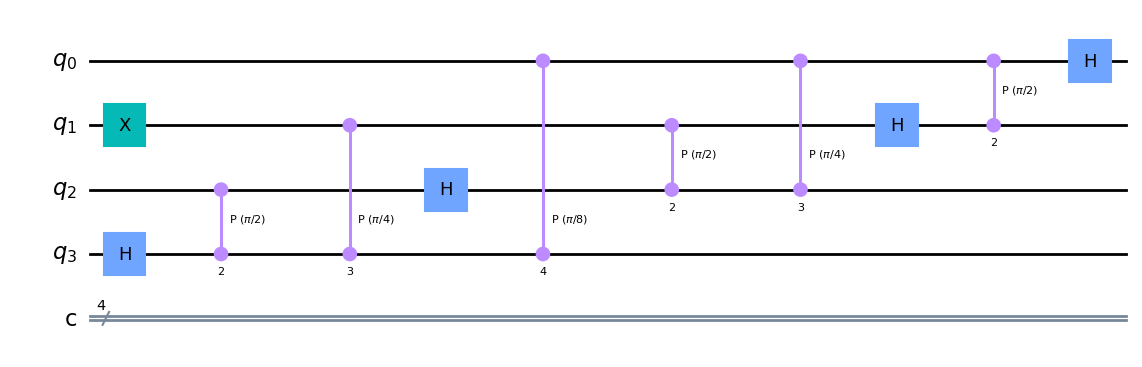

In [14]:
n = 4
number = 2

qc = QuantumCircuit(n, n)

set_start_state(qc, number, 0)

qc = qc.compose(qft(n, False), range(n))
# qc = qc.compose(qft_dagger(n, True), range(n))


# qc.measure(range(n), range(n))

qc.draw('mpl')

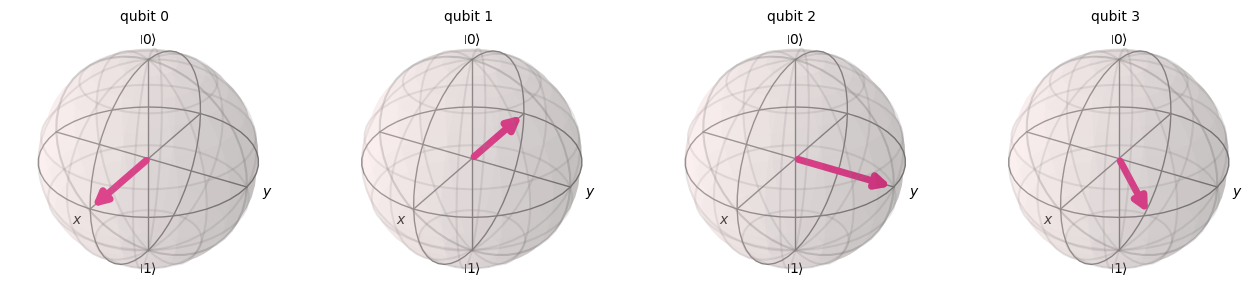

In [15]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

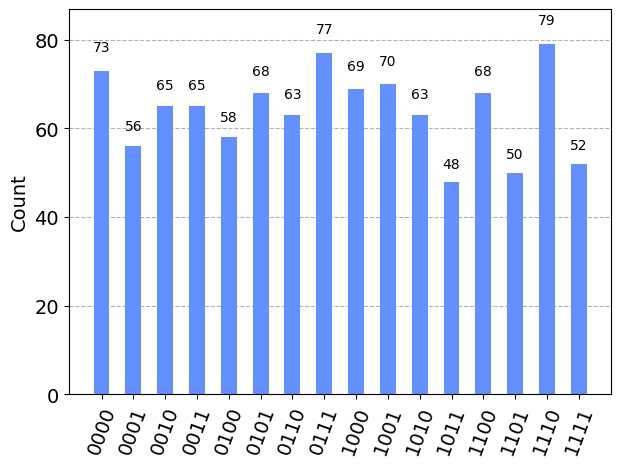

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
qc_tran_aer = transpile(qc, aer_sim, optimization_level=0)
counts_aer = aer_sim.run(qc_tran_aer).result().get_counts()
plot_histogram(counts_aer)


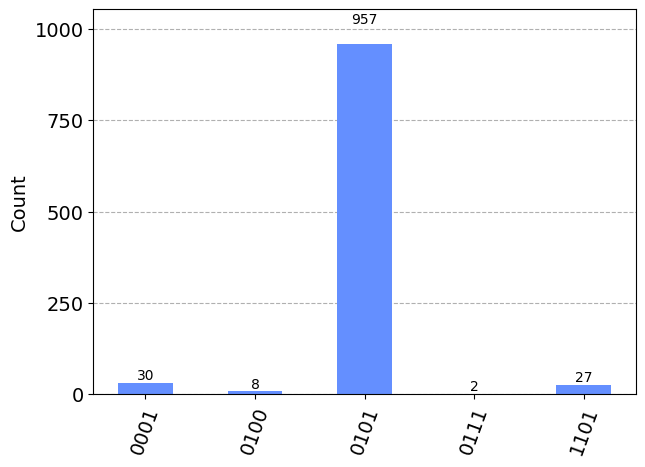

In [25]:
fake_backend = FakeAuckland()

circ_no_bar = RemoveBarriers()(qc)

tran0 = transpile(circ_no_bar, backend=fake_backend, optimization_level=0)
# tran3 = transpile(circ_no_bar, backend=fake_backend, optimization_level=3)
counts_aer = fake_backend.run(qc_tran_aer).result().get_counts()
plot_histogram(counts_aer)

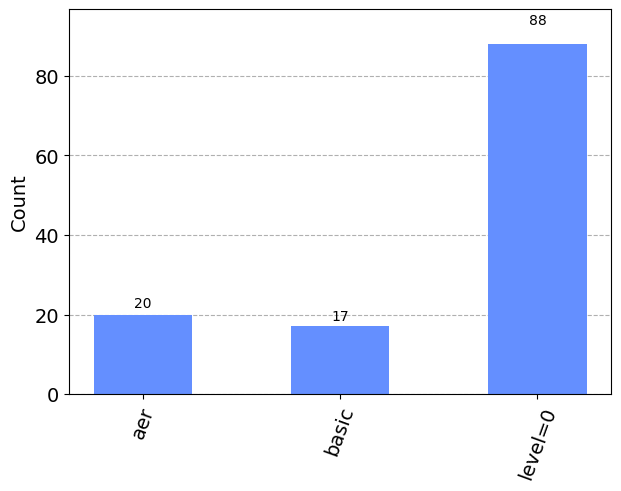

In [26]:
depth_basic = circ_no_bar.depth()
depth0 = tran0.depth()
depth3 = qc_tran_aer.depth()

plot_histogram({"basic":depth_basic, "level=0":depth0, "aer":depth3})